# Data exploration

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Define the file path
file_path = 'ifa.txt'

# Read and print the file content
with open(file_path, 'r') as file:
    content = file.read()

# Display the content in a Jupyter-friendly way
from IPython.display import display, Markdown

display(Markdown(f"```\n{content}\n```"))



```
SCORE: total_score          Sc Sc_int_area complex_normalized           dG_cross dG_cross/dSASAx100 dG_separated dG_separated/dSASAx100 dSASA_hphobic dSASA_int dSASA_polar         ddg delta_unsatHbonds hbond_E_fraction hbonds_int   nres_all   nres_int   packstat per_residue_energy_int               sc_value side1_normalized side1_score side2_normalized side2_score description 	code energy
SCORE:       0.000       0.705     649.170             -3.006            -41.078             -3.462      -39.037                 -3.290       650.159  1186.659     536.500     -39.102             8.000            0.209      7.000    248.000     50.000      0.000                 -2.803                  0.705           -2.737     -68.434           -2.868     -71.699 1bzq_3_0001_0001	1bzq -10.17
SCORE:       0.000       0.766    2654.735             -3.490              0.000              0.000     -184.226                 -4.437      2570.916  4151.815    1580.899    -183.499             3.000            0.193     31.000    214.000     85.000      0.000                 -3.490                  0.744           -3.496    -150.328           -3.484    -146.324 1mvf_3_0001_0001	1mvf -9.56
SCORE:       0.000       0.679     735.682             -3.333            -44.943             -3.834      -40.897                 -3.489       558.986  1172.192     613.206     -41.236             5.000            0.254      9.000    251.000     55.000      0.000                 -3.353                  0.679           -3.318     -99.535           -3.396     -84.901 1op9_3_0001_0001	1op9 -12.17
SCORE:       0.000       0.706     846.487             -3.252            -50.486             -3.157      -49.024                 -3.066       673.617  1599.181     925.564     -49.056            11.000            0.358     13.000    253.000     61.000      0.000                 -3.062                  0.707           -3.160     -85.310           -2.985    -101.496 1ri8_3_0001_0001	1ri8 -11.65
SCORE:       0.000       0.704     944.446             -3.063            -46.168             -2.775      -44.721                 -2.688       674.062  1663.572     989.510     -44.721             6.000            0.299     10.000    252.000     62.000      0.000                 -2.962                  0.704           -3.310     -99.314           -2.635     -84.310 1rjc_3_0001_0001	1rjc -13.80
SCORE:       0.000       0.721     838.648             -3.194            -53.191             -3.356      -48.708                 -3.073       701.996  1584.856     882.860     -48.862             2.000            0.373     15.000    248.000     59.000      0.000                 -3.387                  0.721           -3.259     -81.465           -3.481    -118.351 1zv5_3_0001_0001	1zv5 -10.91
SCORE:       0.000       0.784     620.293             -3.077            -32.197             -3.104      -31.312                 -3.018       555.427  1037.379     481.951     -31.312            10.000            0.194      6.000    251.000     46.000      0.000                 -3.051                  0.784           -3.370     -87.624           -2.636     -52.721 1zvh_3_0001_0001	1zvh -8.90
SCORE:       0.000       0.712     890.316             -3.319            -51.454             -3.428      -49.683                 -3.310       689.962  1501.166     811.204     -50.034             2.000            0.293     11.000    253.000     50.000      0.000                 -3.469                  0.712           -3.356     -90.613           -3.603     -82.860 1zvy_3_0001_0001	1zvy -12.41
SCORE:       0.000       0.749     639.495             -3.214            -35.992             -3.496      -34.092                 -3.312       575.761  1029.479     453.718     -34.082            14.000            0.223      6.000    229.000     46.000      0.000                 -3.466                  0.749           -3.489     -80.248           -3.443     -79.200 2bse_3_0001_0001	2bse -12.08
SCORE:       0.000       0.793     711.478             -3.322            -49.691             -3.813      -47.498                 -3.645       721.126  1303.248     582.122     -47.497             3.000            0.213      7.000    354.000     59.000      0.000                 -3.739                  0.793           -4.045    -141.572           -3.293     -79.028 3g9a_3_0001_0001	3g9a -12.75
SCORE:       0.000       0.665     827.763             -3.124            -40.263             -3.117      -36.605                 -2.834       639.328  1291.801     652.472     -37.465            13.000            0.251      9.000    335.000     57.000      0.000                 -3.095                  0.665           -3.273     -81.836           -2.955     -94.566 3k1k_3_0001_0001	3k1k -12.59
SCORE:       0.000       0.720    5524.981             -3.108              0.000              0.000     -318.370                 -3.787      5503.434  8406.739    2903.305    -316.802            31.000            0.152     47.000    540.000    227.000      0.000                 -3.285                  0.728           -3.445    -382.344           -3.132    -363.289 3k3q_3_0001_0001	3k3q -13.41
SCORE:       0.000       0.709     702.964             -3.294            -39.154             -3.208      -38.909                 -3.188       696.251  1220.583     524.332     -38.937             6.000            0.173      6.000    274.000     60.000      0.000                 -3.093                  0.709           -2.933     -76.246           -3.217    -109.363 3k74_3_0001_0001	3k74 -10.19
SCORE:       0.000       0.563    1042.694             -3.288            -51.530             -3.183      -50.261                 -3.104       854.873  1618.972     764.099     -49.764            12.000            0.302     12.000    489.000     76.000      0.000                 -3.520                  0.563           -3.743    -145.961           -3.285    -121.536 3zkq_3_0001_0001	3zkq -12.17
SCORE:       0.000       0.709     692.608             -3.223            -43.858             -3.403      -37.579                 -2.916       490.572  1288.729     798.156     -40.139             5.000            0.399     13.000    435.000     45.000      0.000                 -2.648                  0.709           -3.091     -71.097           -2.185     -48.074 4c57_3_0001_0001	4c57 -9.85
SCORE:       0.000       0.670     697.094             -3.204            -39.821             -3.392      -37.833                 -3.222       597.734  1174.050     576.317     -37.621             3.000            0.367     11.000    383.000     44.000      0.000                 -3.041                  0.670           -3.683     -88.398           -2.270     -45.391 4c59_3_0001_0001	4c59 -10.90
SCORE:       0.000       0.670    1115.870             -3.380            -67.821             -3.639      -61.652                 -3.308       980.838  1863.549     882.712     -61.665             8.000            0.158     13.000    276.000     78.000      0.000                 -3.292                  0.670           -3.270    -137.341           -3.318    -119.458 4eig_3_0001_0001	4eig -12.28
SCORE:       0.000       0.770     648.346             -3.324            -51.626             -5.121      -46.814                 -4.643       465.390  1008.188     542.798     -46.816             5.000            0.289     11.000    286.000     50.000      0.000                 -3.276                  0.770           -3.886    -101.040           -2.616     -62.781 4eiz_3_0001_0001	4eiz -11.63
SCORE:       0.000       0.729    5936.073             -3.362              0.000              0.000     -372.978                 -3.916      5308.822  9524.766    4215.944    -360.188            27.000            0.394    117.000    616.000    167.000      0.000                 -3.575                  0.719           -3.618    -325.628           -3.526    -271.474 4hep_3_0001_0001	4hep -10.17
SCORE:       0.000       0.686     788.040             -3.194            -43.534             -3.223      -42.455                 -3.143       831.841  1350.863     519.022     -42.455             6.000            0.194      7.000    257.000     62.000      0.000                 -3.560                  0.686           -3.879    -135.774           -3.147     -84.960 4i0c_3_0001_0001	4i0c -8.65
SCORE:       0.000       0.634     921.908             -2.606            -49.676             -2.918      -47.947                 -2.816       771.050  1702.524     931.473     -47.754            10.000            0.275     16.000    649.000     64.000      0.000                 -2.633                  0.634           -2.896    -104.256           -2.296     -64.281 4krp_3_0001_0001	4krp -9.25
SCORE:       0.000       0.753    1539.159             -2.906            -83.726             -3.566      -75.887                 -3.232      1674.174  2348.040     673.866     -75.915            11.000            0.104      6.000    574.000     87.000      0.000                 -2.713                  0.753           -2.966    -151.267           -2.355     -84.795 4lde_3_0001_0001	4lde -11.18
SCORE:       0.000       0.720    1072.805             -2.959            -66.929             -3.729      -62.868                 -3.503       975.171  1794.916     819.746     -62.764            10.000            0.282     12.000    377.000     72.000      0.000                 -2.374                  0.720           -3.364    -131.201           -1.203     -39.695 4lgp_3_0001_0001	4lgp -13.15
SCORE:       0.000       0.799     856.597             -3.267            -55.731             -4.007      -54.716                 -3.934       747.233  1390.996     643.763     -54.716             7.000            0.197     10.000    375.000     56.000      0.000                 -3.525                  0.799           -3.560     -96.112           -3.493    -101.286 4lgr_3_0001_0001	4lgr -13.59
SCORE:       0.000       0.790     631.341             -3.183            -49.602             -4.595      -48.849                 -4.525       660.749  1079.495     418.747     -48.894             6.000            0.171      8.000    392.000     49.000      0.000                 -3.144                  0.789           -3.677     -91.917           -2.588     -62.119 4lgs_3_0001_0001	4lgs -13.40
SCORE:       0.000       0.601     478.485             -3.153            -20.316             -2.035      -19.784                 -1.981       588.592   998.516     409.924     -19.784            15.000            0.143      2.000    378.000     43.000      0.000                 -1.974                  0.601           -2.246     -51.654           -1.660     -33.209 4lhj_3_0001_0001	4lhj -12.62
SCORE:       0.000       0.817     629.014             -2.956            -48.697             -4.518      -47.748                 -4.430       599.410  1077.937     478.527     -47.748             6.000            0.229      8.000    388.000     45.000      0.000                 -2.632                  0.817           -3.657     -80.450           -1.652     -37.985 4lhq_3_0001_0001	4lhq -11.40
SCORE:       0.000       0.639     780.152             -3.343            -40.955             -2.848      -37.239                 -2.589       712.034  1438.196     726.163     -36.616             7.000            0.270      8.000    266.000     68.000      0.000                 -3.306                  0.619           -3.633    -134.413           -2.917     -90.417 4nbx_3_0001_0001	4nbx -11.87
SCORE:       0.000       0.785     628.111             -3.304            -47.278             -4.624      -43.205                 -4.226       562.685  1022.359     459.675     -43.165             5.000            0.255      8.000    268.000     41.000      0.000                 -3.788                  0.785           -4.246     -76.420           -3.430     -78.882 4nbz_3_0001_0001	4nbz -10.81
SCORE:       0.000       0.664    1585.560             -3.177              0.000              0.000      -81.826                 -2.795      1801.251  2928.036    1126.785     -79.598             9.000            0.184     13.000    287.000     43.000      0.000                 -3.157                  0.731           -3.166     -69.651           -3.148     -66.101 4orz_3_0001_0001	4orz -10.11
SCORE:       0.000       0.712    1486.401             -3.176              0.000              0.000      -79.304                 -3.148      1413.281  2519.013    1105.732     -78.472             1.000            0.840     54.000    461.000     44.000      0.000                 -3.406                  0.721           -3.756     -90.144           -2.986     -59.729 4p2c_3_0001_0001	4p2c -11.46
SCORE:       0.000       0.804     484.720             -3.113            -32.365             -3.558      -30.902                 -3.397       470.012   909.747     439.735     -31.367             4.000            0.233      5.000    326.000     57.000      0.000                 -3.219                  0.804           -3.687     -95.863           -2.826     -87.593 4qo1_3_0001_0001	4qo1 -7.53
SCORE:       0.000       0.746     725.515             -3.235            -44.485             -3.586      -42.651                 -3.438       598.181  1240.596     642.415     -42.389             5.000            0.288     11.000    228.000     47.000      0.000                 -3.404                  0.746           -4.000    -104.012           -2.665     -55.960 4s10_3_0001_0001	4s10 -12.28
SCORE:       0.000       0.735     766.085             -3.140            -47.166             -3.920      -45.156                 -3.753       693.361  1203.223     509.862     -44.938             5.000            0.242      7.000    265.000     64.000      0.000                 -2.884                  0.735           -2.531     -86.044           -3.284     -98.522 4w6w_3_0001_0001	4w6w -11.52
SCORE:       0.000       0.735     894.658             -3.082            -53.399             -3.591      -46.909                 -3.155       686.743  1486.921     800.178     -48.473             9.000            0.346     11.000    267.000     63.000      0.000                 -3.054                  0.735           -3.181    -114.524           -2.884     -77.864 4w6x_3_0001_0001	4w6x -11.30
SCORE:       0.000       0.610     767.763             -3.198            -41.076             -2.841      -35.817                 -2.478       750.989  1445.693     694.704     -37.239             5.000            0.193      6.000    274.000     62.000      0.000                 -2.802                  0.610           -3.039     -88.130           -2.593     -85.571 4w6y_3_0001_0001	4w6y -12.00
SCORE:       0.000       0.697     941.949             -3.267            -52.073             -3.453      -49.537                 -3.284       850.742  1508.232     657.490     -49.537             6.000            0.177      8.000    369.000     64.000      0.000                 -3.284                  0.697           -3.636    -138.179           -2.768     -71.974 4wem_3_0001_0001	4wem -7.05
SCORE:       0.000       0.774     675.571             -3.189            -41.008             -3.287      -38.338                 -3.073       750.930  1247.495     496.565     -38.409             3.000            0.222      7.000    374.000     57.000      0.000                 -3.220                  0.774           -3.419    -116.260           -2.925     -67.265 4wen_3_0001_0001	4wen -9.55
SCORE:       0.000       0.688     573.371             -2.992            -30.582             -3.140      -29.677                 -3.047       511.522   973.833     462.312     -29.681             7.000            0.339      7.000    344.000     44.000      0.000                 -2.229                  0.688           -3.001     -66.021           -1.457     -32.060 4weu_3_0001_0001	4weu -7.15
SCORE:       0.000       0.794     874.784             -3.213            -51.381             -3.455      -43.599                 -2.932       975.692  1486.995     511.303     -43.664            12.000            0.125      4.000    424.000     61.000      0.000                 -3.223                  0.794           -3.310    -102.615           -3.133     -94.001 4x7e_3_0001_0001	4x7e -11.10
SCORE:       0.000       0.693    1195.995             -3.213            -60.913             -3.248      -55.989                 -2.985      1109.609  1875.587     765.978     -56.812             7.000            0.157      7.000    421.000     74.000      0.000                 -3.164                  0.693           -3.405    -129.397           -2.909    -104.721 4x7f_3_0001_0001	4x7f -10.40
SCORE:       0.000       0.548    2546.406             -3.249              0.000              0.000      -98.310                 -2.536      2449.729  3876.096    1426.366     -96.410            10.000            0.430     33.000    510.000     73.000      0.000                 -3.539                  0.539           -3.316    -119.359           -3.756    -138.962 5e7f_3_0001_0001	5e7f -10.97
SCORE:       0.000       0.704    1173.105             -3.329            -65.255             -3.198      -55.457                 -2.718       926.206  2040.609    1114.402     -55.437            15.000            0.379     17.000    373.000     85.000      0.000                 -3.316                  0.704           -3.429    -195.431           -3.087     -86.428 5hgg_3_0001_0001	5hgg -14.01
SCORE:       0.000       0.676    1215.906             -3.181            -63.372             -3.198      -58.542                 -2.954      1043.262  1981.654     938.392     -58.560            12.000            0.374     14.000    490.000     83.000      0.000                 -2.970                  0.676           -2.987    -137.424           -2.948    -109.067 5hvf_3_0001_0001	5hvf -14.05
SCORE:       0.000       0.709     946.151             -3.420            -54.977             -3.621      -50.354                 -3.316       618.680  1518.390     899.711     -50.993             8.000            0.274     13.000    243.000     51.000      0.000                 -3.195                  0.709           -3.817    -110.690           -2.375     -52.250 5imk_3_0001_0001	5imk -8.28
SCORE:       0.000       0.653     755.251             -3.302            -41.604             -3.208      -40.385                 -3.114       720.577  1296.850     576.274     -40.383             1.000            0.267      8.000    383.000     59.000      0.000                 -3.170                  0.653           -2.923    -102.320           -3.529     -84.707 5j56_3_0001_0001	5j56 -11.59
SCORE:       0.000       0.745     621.159             -3.198            -50.300             -4.268      -46.206                 -3.921       480.896  1178.500     697.603     -46.206             7.000            0.365     12.000    388.000     45.000      0.000                 -3.059                  0.745           -3.241     -71.304           -2.885     -66.361 5j57_3_0001_0001	5j57 -14.6

```

In [3]:
import pandas as pd

# Step 1: Read the content of the file
file_path = 'ifa.txt'

with open(file_path, 'r') as file:
    content = file.readlines()

# Step 2: Process the content into a DataFrame
data = [line.strip().split() for line in content]
df = pd.DataFrame(data)

# Step 3: Save the DataFrame to CSV
output_csv_path = 'ifa.csv'
df.to_csv(output_csv_path, index=False)

print(f"File saved to {output_csv_path}")

File saved to ifa.csv


# Defining k in kNN

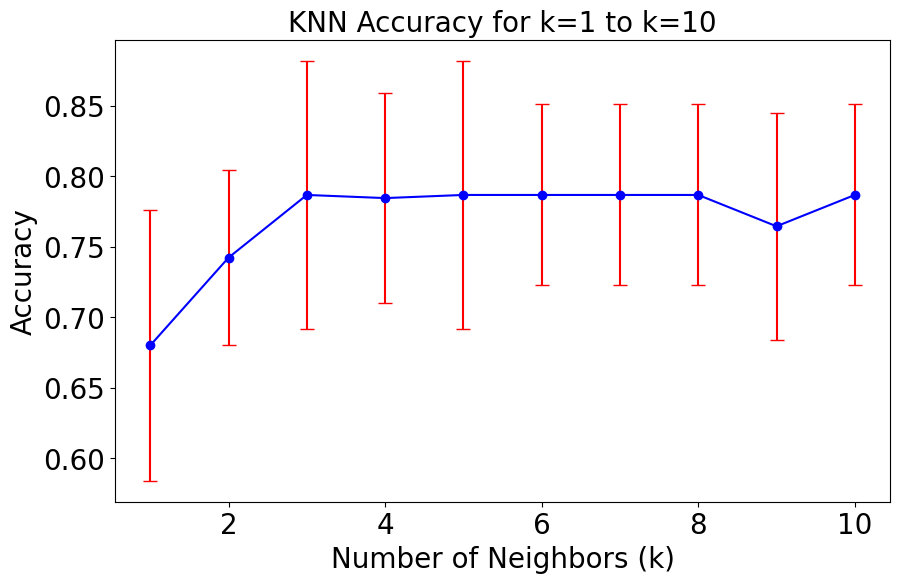

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Load the data

df = pd.read_csv('ifa.csv')
df = pd.read_csv(csv_file_path, header=1)

# Assuming 'energy' needs to be classified into two classes, high and low
# Define threshold for high and low energy based on a cutoff
threshold = -11.5
df['target'] = (df['energy'] < threshold).astype(int)  # High affinity if less than -11.5

# Define the features for the analysis
features = [
    'complex_normalized', 'side2_score', 'hbond_E_fraction',
    'dG_separated/dSASAx100', 'delta_unsatHbonds', 'side1_normalized',
    'dG_cross/dSASAx100', 'dSASA_hphobic', 'ddg', 'side1_score'
]
X = df[features]
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

k_range = range(1, 11)
k_scores = []
k_std = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_lda, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    k_std.append(scores.std())

plt.figure(figsize=(10, 6))
plt.errorbar(k_range, k_scores, yerr=k_std, fmt='o-', color='blue', ecolor='red', capsize=5)
plt.xlabel('Number of Neighbors (k)', size=20)
plt.ylabel('Accuracy', size=20)
plt.title('KNN Accuracy for k=1 to k=10', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


# Training and assessment


In [6]:
# Define the path to the CSV file
csv_file_path = 'ifa.csv'

# Read the CSV file, using the first row as the header
df = pd.read_csv(csv_file_path, header=1)

# Display the column names to confirm
print("Columns in the DataFrame:")
print(df.columns)

# Define the variables of interest
variables = [
    'complex_normalized', 'side2_score', 'hbond_E_fraction',
    'dG_separated/dSASAx100', 'delta_unsatHbonds', 'side1_normalized',
    'dG_cross/dSASAx100', 'dSASA_hphobic', 'ddg', 'side1_score'
]

# Check if all required columns are present
missing_columns = [col for col in variables + ['energy'] if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Consider the specified variables
    df = df[variables + ['energy']]

    # Split target into high affinity and low affinity
    df['affinity'] = df['energy'].apply(lambda x: 'high' if x < -11.5 else 'low')

    # Drop the original energy column
    df = df.drop(columns=['energy'])

    print(df.head())
   # Split data into features and target
    X = df[variables]
    y = df['affinity']

    # Standardize the features
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    # Apply LDA
    lda = LinearDiscriminantAnalysis()
    X_lda = lda.fit_transform(X, y)

    # Split data into training and testing sets (70:30)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, stratify=y, random_state=42)

    # Initialize KNN classifier with k=6
    knn = KNeighborsClassifier(n_neighbors=6)

    # Fit the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Function to compute evaluation metrics
    def evaluate_model(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, pos_label='high')
        recall = recall_score(y_true, y_pred, pos_label='high')
        roc_auc = roc_auc_score(pd.get_dummies(y_true)['high'], pd.get_dummies(y_pred)['high'])
        mcc = matthews_corrcoef(y_true, y_pred)
        return accuracy, precision, recall, roc_auc, mcc

    # Compute metrics for the test set
    test_accuracy, test_precision, test_recall, test_roc_auc, test_mcc = evaluate_model(y_test, y_pred)

    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")
    print(f"Test ROC AUC: {test_roc_auc}")
    print(f"Test MCC: {test_mcc}")

    # Perform 5-fold cross-validation and compute mean and SD for each metric
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_accuracy_scores = cross_val_score(knn, X_lda, y, cv=kf, scoring='accuracy')
    cv_accuracy_mean = cv_accuracy_scores.mean()
    cv_accuracy_std = cv_accuracy_scores.std()

    cv_precision_scores = cross_val_score(knn, X_lda, y, cv=kf, scoring='precision_macro')
    cv_precision_mean = cv_precision_scores.mean()
    cv_precision_std = cv_precision_scores.std()

    cv_recall_scores = cross_val_score(knn, X_lda, y, cv=kf, scoring='recall_macro')
    cv_recall_mean = cv_recall_scores.mean()
    cv_recall_std = cv_recall_scores.std()

    cv_roc_auc_scores = cross_val_score(knn, X_lda, y, cv=kf, scoring='roc_auc')
    cv_roc_auc_mean = cv_roc_auc_scores.mean()
    cv_roc_auc_std = cv_roc_auc_scores.std()

    cv_mcc_scores = cross_val_score(knn, X_lda, y, cv=kf, scoring='roc_auc')
    cv_mcc_mean = cv_mcc_scores.mean()
    cv_mcc_std = cv_mcc_scores.std()

    print(f"\nCross-Validation Accuracy: {cv_accuracy_mean} ± {cv_accuracy_std}")
    print(f"Cross-Validation Precision: {cv_precision_mean} ± {cv_precision_std}")
    print(f"Cross-Validation Recall: {cv_recall_mean} ± {cv_recall_std}")
    print(f"Cross-Validation ROC AUC: {cv_roc_auc_mean} ± {cv_roc_auc_std}")
    print(f"Cross-Validation MCC: {cv_mcc_mean} ± {cv_mcc_std}")


Columns in the DataFrame:
Index(['SCORE:', 'total_score', 'Sc', 'Sc_int_area', 'complex_normalized',
       'dG_cross', 'dG_cross/dSASAx100', 'dG_separated',
       'dG_separated/dSASAx100', 'dSASA_hphobic', 'dSASA_int', 'dSASA_polar',
       'ddg', 'delta_unsatHbonds', 'hbond_E_fraction', 'hbonds_int',
       'nres_all', 'nres_int', 'packstat', 'per_residue_energy_int',
       'sc_value', 'side1_normalized', 'side1_score', 'side2_normalized',
       'side2_score', 'description', 'code', 'energy'],
      dtype='object')
   complex_normalized  side2_score  hbond_E_fraction  dG_separated/dSASAx100  \
0              -3.006      -71.699             0.209                  -3.290   
1              -3.490     -146.324             0.193                  -4.437   
2              -3.333      -84.901             0.254                  -3.489   
3              -3.252     -101.496             0.358                  -3.066   
4              -3.063      -84.310             0.299                  -2.6

# ROC AUC

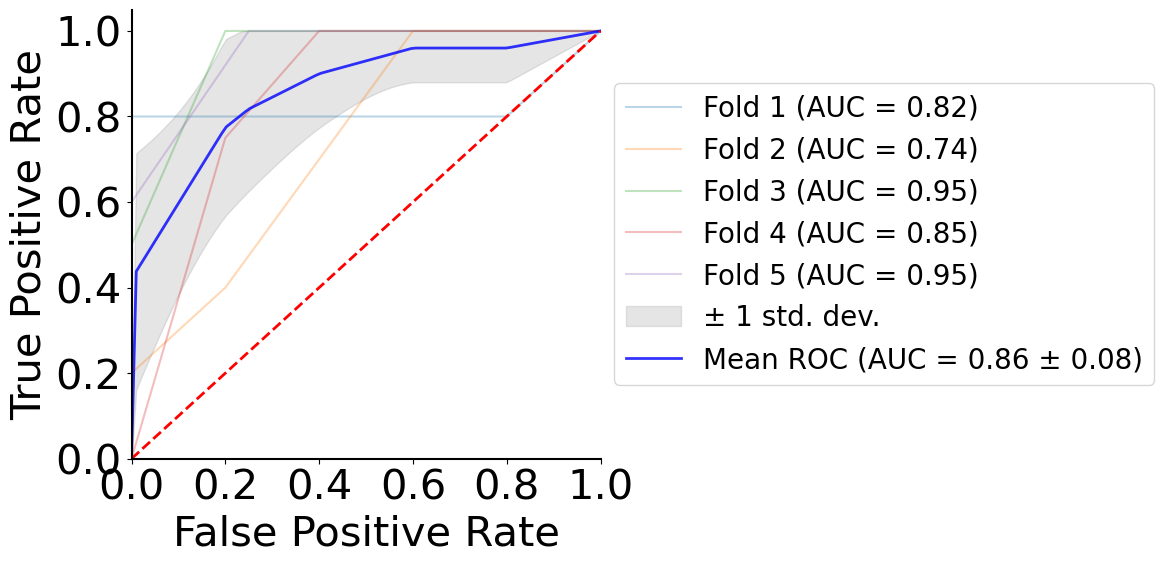

In [7]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Load the data

df = pd.read_csv('ifa.csv')
df = pd.read_csv(csv_file_path, header=1)

# Assuming 'energy' needs to be classified into two classes, high and low
# Define threshold for high and low energy based on a cutoff
threshold = -11.5
df['target'] = (df['energy'] < threshold).astype(int)  # High affinity if less than -11.5

# Define the features for the analysis
features = [
    'complex_normalized', 'side2_score', 'hbond_E_fraction',
    'dG_separated/dSASAx100', 'delta_unsatHbonds', 'side1_normalized',
    'dG_cross/dSASAx100', 'dSASA_hphobic', 'ddg', 'side1_score'
]
X = df[features]
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

# Setup 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# To store ROC curve data
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Plotting initialization
fig, ax = plt.subplots(figsize=(12,6))

for i, (train, test) in enumerate(cv.split(X_lda, y)):
    # Train KNN on the transformed LDA data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_lda[train], y[train])

    # Predict probabilities and compute ROC data
    y_proba = knn.predict_proba(X_lda[test])[:, 1]
    fpr, tpr, _ = roc_curve(y[test], y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Interpolate TPR for current FPR
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0
    tprs.append(tpr_interp)

    # Plot ROC for current fold
    ax.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})', alpha=0.3)

# Calculate mean and std deviation of ROC
mean_tpr = np.mean(tprs, axis=0)
std_tpr = np.std(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Fill between the upper and lower bounds of TPR
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 std. dev.')

# Plot mean ROC
ax.plot(mean_fpr, mean_tpr, color='blue', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red')

from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

# Final plot adjustments
#ax.set(xlim=[0, 1], ylim=[0, 1.05], xlabel='False Positive Rate', ylabel='True Positive Rate')
#ax.set_title('5-Fold Cross-Validation ROC')
#ax.legend(loc="lower right", fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

# Final plot setup with customized labels and tick sizes
ax.set(xlim=[0, 1], ylim=[0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=30)  # Set font size for x-axis label
ax.set_ylabel('True Positive Rate', fontsize=30)  # Set font size for y-axis label

# Customize tick labels size
ax.xaxis.set_major_locator(MultipleLocator(0.2))  # Set major ticks to be at every 0.1
ax.yaxis.set_major_locator(MultipleLocator(0.2))  # Set major ticks to be at every 0.1

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Adjust frame line width
#for spine in ax.spines.values():
#    spine.set_linewidth(1.5)  # Increase frame line width

    # Customize the plot frame
ax = plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout(pad=2.0)
plt.savefig('roc_auc.png', format='png', dpi=600)

plt.show()